In [9]:
from torch.utils.data import DataLoader
import numpy as np

from util.pollutionDataset import PollutionDataset

In [10]:
csv_path = '../data/pollution.csv'
missing_channels = (0,)
missing_num = (2*24,) # last two days of week
task_type = 'forecasting'

# Initialize dataset
dataset = PollutionDataset(
    path=csv_path,
    missing_channels=missing_channels,
    missing_num=missing_num,
    task_type=task_type
)

# Wrap in DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Iterate over batches
batch = next(iter(dataloader))
full_series = batch['full_series']     # (B, channels, seq_len)
condition = batch['condition']         # (B, channels, seq_len) - input to model
target = batch['target']               # (B, total_missing) - ground truth values
mask = batch['mask']                   # (B, channels, seq_len) - indicates missing entries

print("Full Series Shape:", full_series.shape)
print("Condition Shape:", condition.shape)
print("Target Shape:", target.shape)
print("Mask Shape:", mask.shape)

Full Series Shape: torch.Size([1, 7, 168])
Condition Shape: torch.Size([1, 7, 168])
Target Shape: torch.Size([1, 1, 48])
Mask Shape: torch.Size([1, 7, 168])


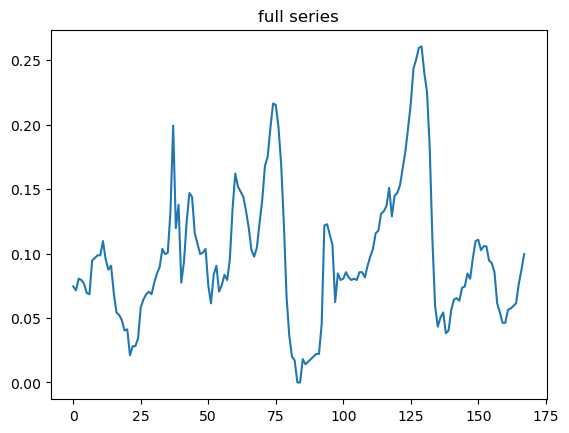

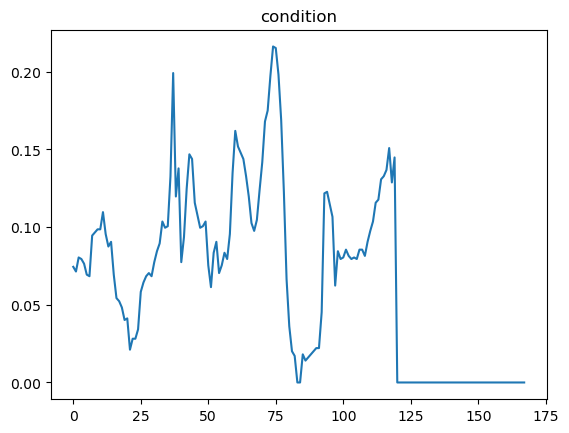

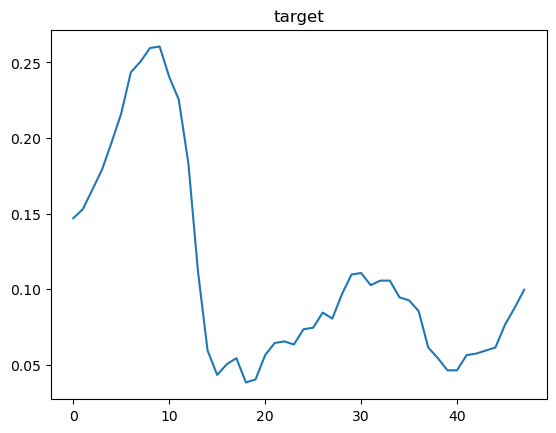

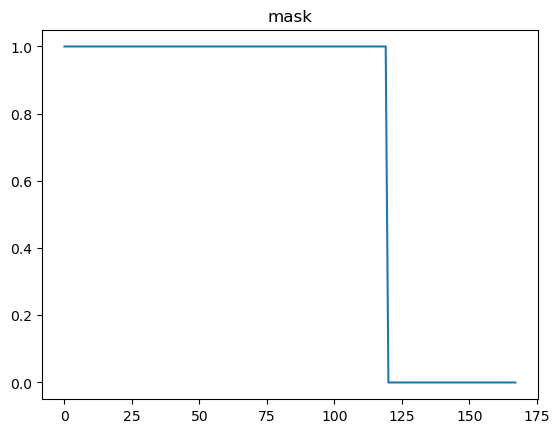

In [13]:
from matplotlib import pyplot as plt
batch_i = 0
channel_i = 0
series = {'full series': full_series, 'condition': condition, 'target': target, 'mask': mask}
for name, serie in series.items():
    y = serie[batch_i,channel_i,:].numpy()
    x = np.arange(0,y.size,1)
    plt.plot(x,y)
    plt.title(name)
    plt.show()